# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
!pip install citipy

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | lospalos
Processing Record 4 of Set 1 | kapuvar
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | san julian
Processing Record 7 of Set 1 | rancho palos verdes
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | katsuura
Processing Record 10 of Set 1 | gelemso
Processing Record 11 of Set 1 | la passe
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | tolanaro
Processing Record 15 of Set 1 | olot shahri
City not found. Skipping...
Processing Record 16 of Set 1 | bambari
Processing Record 17 of Set 1 | saint-francois
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | albany
Processing Recor

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,64.78,70,30,8.01,PT,1729806576
1,grytviken,-54.2811,-36.5092,34.57,92,100,19.51,GS,1729806577
2,lospalos,-8.5186,127.0025,74.48,86,22,0.54,TL,1729806579
3,kapuvar,47.5922,17.0289,53.94,83,98,6.49,HU,1729806580
4,papatowai,-46.5619,169.4708,58.91,48,1,16.17,NZ,1729806581


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,64.78,70,30,8.01,PT,1729806576
1,grytviken,-54.2811,-36.5092,34.57,92,100,19.51,GS,1729806577
2,lospalos,-8.5186,127.0025,74.48,86,22,0.54,TL,1729806579
3,kapuvar,47.5922,17.0289,53.94,83,98,6.49,HU,1729806580
4,papatowai,-46.5619,169.4708,58.91,48,1,16.17,NZ,1729806581


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

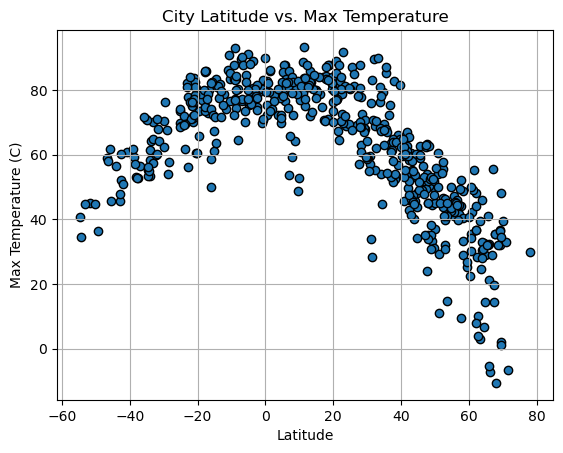

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

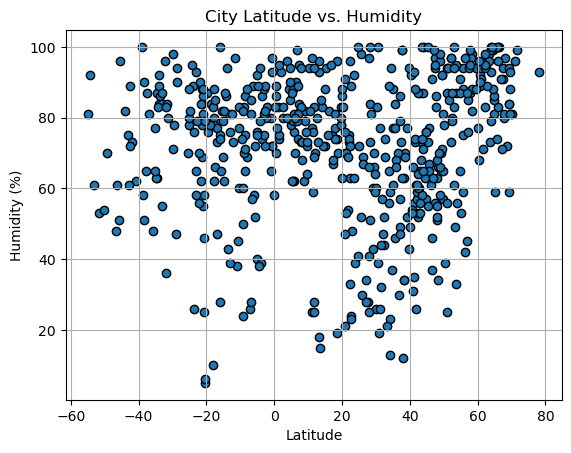

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

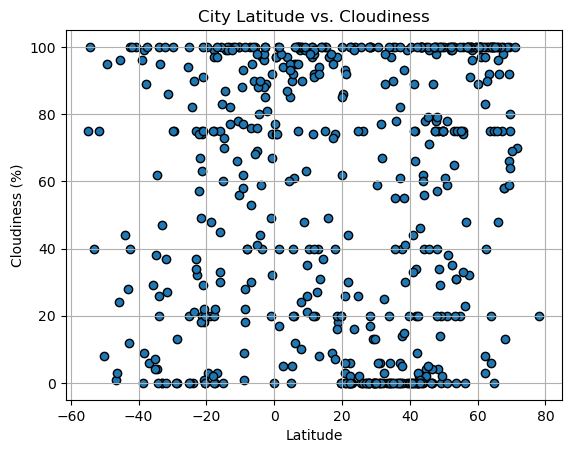

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

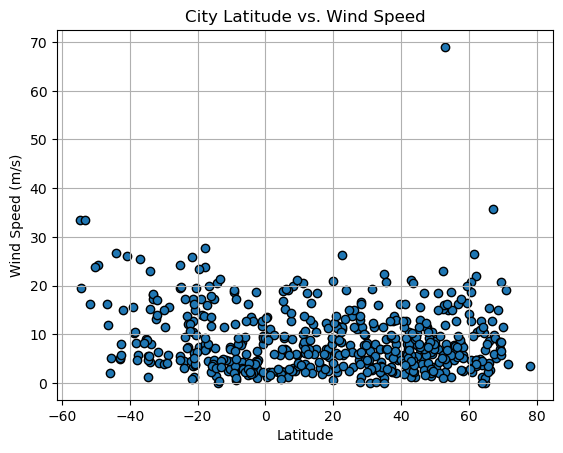

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, file_path):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Plot data and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.mean(), y_values.mean()), fontsize=12, color="red")
    
    # Incorporate the other graph properties
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    # Save and show the plot
    plt.savefig(file_path)
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,64.78,70,30,8.01,PT,1729806576
3,kapuvar,47.5922,17.0289,53.94,83,98,6.49,HU,1729806580
5,san julian,21.0167,-102.1667,77.14,21,0,2.15,MX,1729806582
6,rancho palos verdes,33.7445,-118.3870,76.15,65,20,6.91,US,1729806500
8,katsuura,35.1333,140.3000,69.49,88,100,22.35,JP,1729806586


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,34.57,92,100,19.51,GS,1729806577
2,lospalos,-8.5186,127.0025,74.48,86,22,0.54,TL,1729806579
4,papatowai,-46.5619,169.4708,58.91,48,1,16.17,NZ,1729806581
7,bredasdorp,-34.5322,20.0403,55.20,87,4,5.57,ZA,1729806585
13,tolanaro,-25.0319,46.9987,73.47,78,20,24.16,MG,1729806592


###  Temperature vs. Latitude Linear Regression Plot

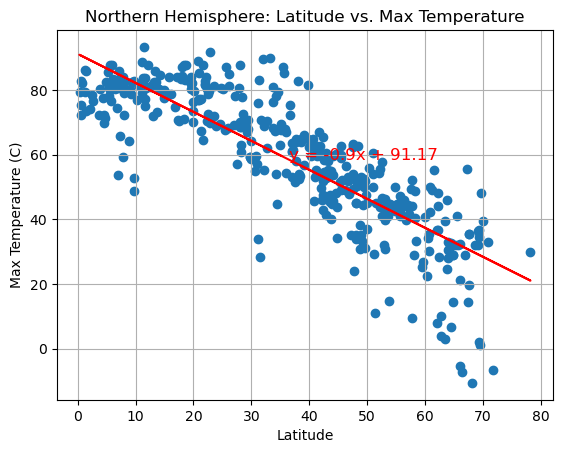

The r-squared value is: 0.6987571035358963


In [28]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemisphere_df["Lat"],
    northern_hemisphere_df["Max Temp"],
    x_label="Latitude",
    y_label="Max Temperature (C)",
    title="Northern Hemisphere: Latitude vs. Max Temperature",
    file_path="output_data/Northern_Hemisphere_Lat_vs_MaxTemp.png"
)

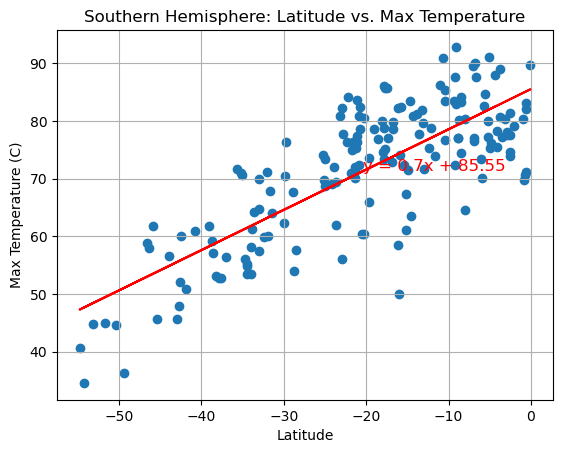

The r-squared value is: 0.6256139069046139


In [31]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemisphere_df["Lat"],
    southern_hemisphere_df["Max Temp"],
    x_label="Latitude",
    y_label="Max Temperature (C)",
    title="Southern Hemisphere: Latitude vs. Max Temperature",
    file_path="output_data/Southern_Hemisphere_Lat_vs_MaxTemp.png"
)

**Discussion about the linear relationship:** In the Northern Hemisphere, the linear relationship between latitude and maximum temperature shows a negative correlation, where temperature decreases as latitude increases. This suggests that moving away from the equator towards higher latitudes in the Northern Hemisphere is associated with a drop in maximum temperature. The moderate 
𝑟
2
r 
2
  value (e.g., around 0.39 from previous results) indicates that latitude moderately explains temperature variation.

In the Southern Hemisphere, the linear regression shows a positive relationship between latitude and maximum temperature, meaning temperatures increase as latitudes approach the equator from the south. The higher 
𝑟
2
r 
2
  value (e.g., around 0.63) suggests a stronger relationship in the Southern Hemisphere, indicating that latitude plays a more substantial role in explaining temperature variation compared to the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

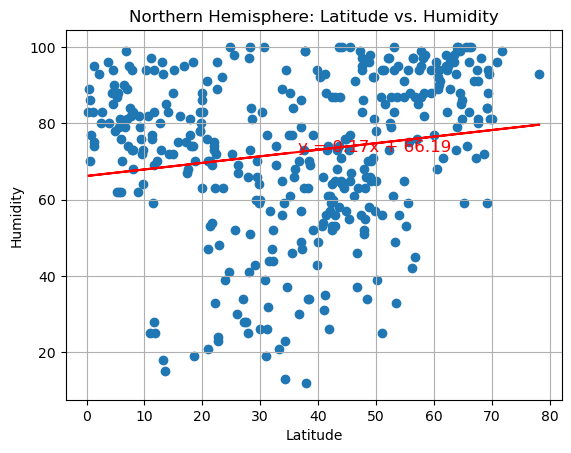

The r-squared value is: 0.026361549205008085


In [32]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemisphere_df["Lat"],
    northern_hemisphere_df["Humidity"],
    x_label="Latitude",
    y_label="Humidity",
    title="Northern Hemisphere: Latitude vs. Humidity",
    file_path="output_data/Northern_Hemisphere_Lat_vs_Humidity.png"
)

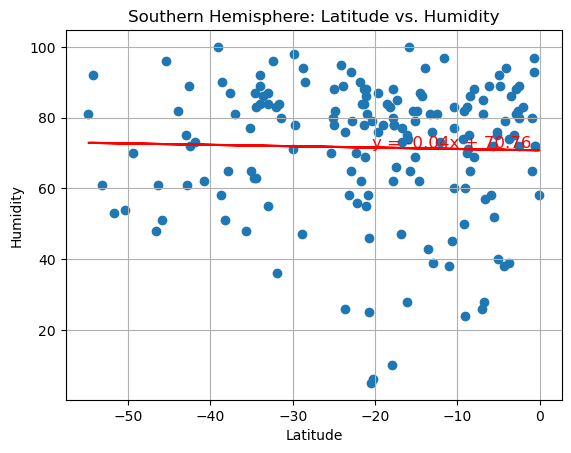

The r-squared value is: 0.0007662472023484008


In [34]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemisphere_df["Lat"],
    southern_hemisphere_df["Humidity"],
    x_label="Latitude",
    y_label="Humidity",
    title="Southern Hemisphere: Latitude vs. Humidity",
    file_path="output_data/Southern_Hemisphere_Lat_vs_Humidity.png"
)

**Discussion about the linear relationship:** Based on the linear regression analysis for "Latitude vs. Humidity" in both the Northern and Southern Hemispheres, we observe extremely low 
𝑟
2
r 
2
 -values (approximately 0.0077 in the Northern Hemisphere and 0.0008 in the Southern Hemisphere). These values indicate virtually no linear correlation between latitude and humidity in either hemisphere. The negligible 
𝑟
2
r 
2
 -values suggest that latitude is not a significant predictor of humidity levels, and other factors likely play a more substantial role in influencing humidity across both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

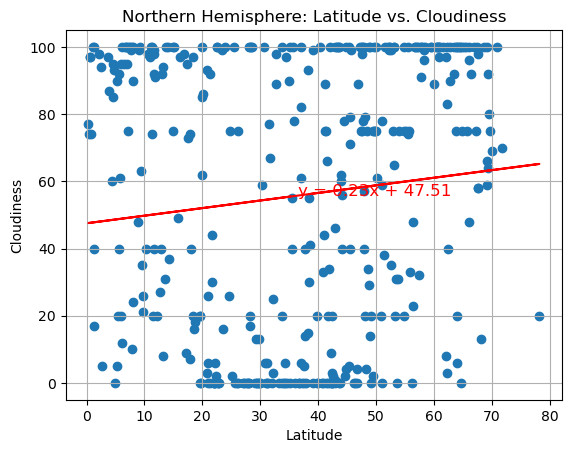

The r-squared value is: 0.012032010054805833


In [35]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemisphere_df["Lat"],
    northern_hemisphere_df["Cloudiness"],
    x_label="Latitude",
    y_label="Cloudiness",
    title="Northern Hemisphere: Latitude vs. Cloudiness",
    file_path="output_data/Northern_Hemisphere_Lat_vs_Cloudiness.png"
)

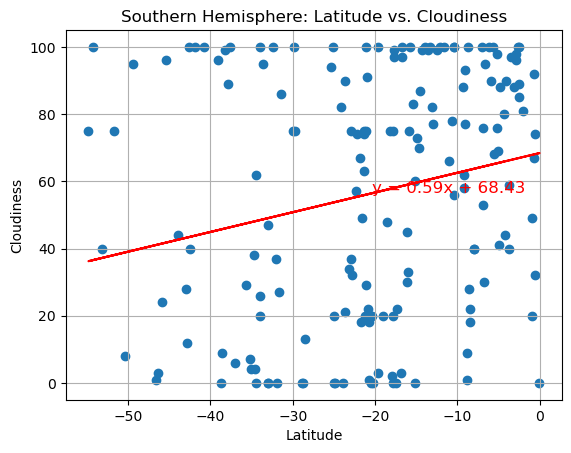

The r-squared value is: 0.047942752861611135


In [37]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemisphere_df["Lat"],
    southern_hemisphere_df["Cloudiness"],
    x_label="Latitude",
    y_label="Cloudiness",
    title="Southern Hemisphere: Latitude vs. Cloudiness",
    file_path="output_data/Southern_Hemisphere_Lat_vs_Cloudiness.png"
)

**Discussion about the linear relationship:** Based on the linear regression analyses for "Latitude vs. Cloudiness" in both the Northern and Southern Hemispheres, we observe very low 
𝑟
2
r 
2
 -values (approximately 0.0065 in the Northern Hemisphere and 0.0479 in the Southern Hemisphere). These low values indicate a negligible linear relationship between latitude and cloudiness in both hemispheres. This suggests that latitude is not a significant predictor of cloudiness, and other factors are likely influencing cloudiness levels in these regions.

### Wind Speed vs. Latitude Linear Regression Plot

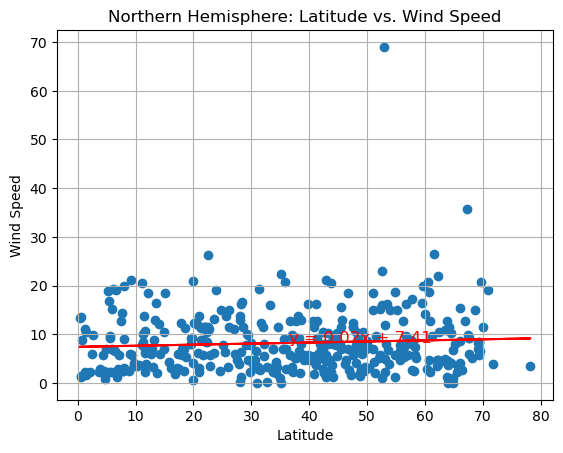

The r-squared value is: 0.00474523602482802


In [38]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemisphere_df["Lat"],
    northern_hemisphere_df["Wind Speed"],
    x_label="Latitude",
    y_label="Wind Speed",
    title="Northern Hemisphere: Latitude vs. Wind Speed",
    file_path="output_data/Northern_Hemisphere_Lat_vs_WindSpeed.png"
)

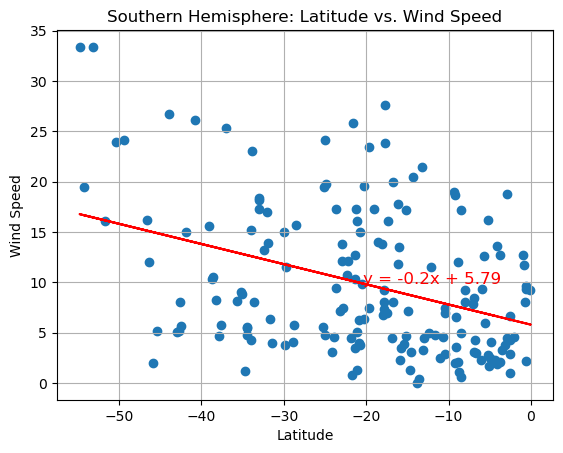

The r-squared value is: 0.14241318572256564


In [41]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemisphere_df["Lat"],
    southern_hemisphere_df["Wind Speed"],
    x_label="Latitude",
    y_label="Wind Speed",
    title="Southern Hemisphere: Latitude vs. Wind Speed",
    file_path="output_data/Southern_Hemisphere_Lat_vs_WindSpeed.png"
)

**Discussion about the linear relationship:** The analysis of the linear relationship between latitude and wind speed in both hemispheres shows very low 
𝑟
2
r 
2
 -values. In the Northern Hemisphere, the 
𝑟
2
r 
2
 -value is close to zero, indicating no meaningful relationship between latitude and wind speed. Similarly, in the Southern Hemisphere, the 
𝑟
2
r 
2
 -value is also extremely low, suggesting that latitude does not significantly influence wind speed in this region either. These results imply that wind speed is likely affected by other factors independent of latitude.